<a href="https://colab.research.google.com/github/herysedra/ady_cov/blob/master/scr/stats/Fampita_mdg_ke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !pip install pingouin

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time
#import pingouin 

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

#from pingouin import corr
import pandas.util.testing as tm

cco_cases_mdg = pd.read_csv("/content/drive/My Drive/data/cco mdg.csv")

tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoa.csv")

ke_datafar = pd.read_csv("/content/drive/My Drive/data/Kenyans data.csv")

mdg_databe = pd.read_csv("/content/drive/My Drive/data/databe mdg.csv")


cco_cases_mdg.set_index('Date', inplace=True)

#tilyvoa.set_index('Daty', inplace=True)



path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
mdg_databe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Loharano  218 non-null    object 
 1   Lnav      118 non-null    object 
 2   Taona     115 non-null    float64
 3   Daty      218 non-null    object 
 4   Toerana   47 non-null     object 
 5   Distrika  73 non-null     object 
 6   Faritra   171 non-null    object 
 7   Avaiza    44 non-null     object 
 8   Fiaviana  37 non-null     object 
 9   Ivao      157 non-null    float64
dtypes: float64(2), object(8)
memory usage: 17.2+ KB


In [0]:
databefar = mdg_databe.groupby('Faritra')
for Faritra in databefar:
    print(Faritra)

('Antananarivo',     Loharano  Lnav  Taona        Daty  ...       Faritra Avaiza Fiaviana Ivao
1     FB-TVM   NaN    NaN  2020-05-08  ...  Antananarivo    NaN      NaN  NaN
13    FB-TVM  vavy   24.0  2020-05-07  ...  Antananarivo    NaN      NaN  NaN
14    FB-TVM  vavy   63.0  2020-05-07  ...  Antananarivo    NaN      NaN  NaN
15    FB-TVM  lahy   25.0  2020-05-07  ...  Antananarivo    NaN      NaN  NaN
16    FB-TVM  vavy   30.0  2020-05-07  ...  Antananarivo    NaN      NaN  NaN
..       ...   ...    ...         ...  ...           ...    ...      ...  ...
200   FB-TVM   NaN    NaN  2020-03-29  ...  Antananarivo    NaN      NaN  NaN
202   FB-TVM   NaN    NaN  2020-03-28  ...  Antananarivo    NaN      NaN  NaN
207   FB-TVM   NaN    NaN  2020-03-27  ...  Antananarivo    NaN      NaN  NaN
213   FB-TVM   NaN    NaN  2020-03-26  ...  Antananarivo    NaN      NaN  NaN
216   FB-TVM   NaN    NaN  2020-03-25  ...  Antananarivo    NaN      NaN  NaN

[88 rows x 10 columns])
('Mahatsiatra Ambony',

In [0]:
Antanabe = databefar.get_group('Antananarivo')
Toamabe = databefar.get_group('Toamasina')

Antanabe
#type(Antanab)
# Antana eto dia fitambarana (key= Faritra iray,object=data momba ilay Faritra)
# Antanadaty = Antana.groupby('Daty')
# Antanadaty dia 
#plt.figure()
#plt.plot(Antana['Daty'], Antana['Ivao'], marker ="+",ls = 'None', color='black')

,Loharano,Lnav,Taona,Daty,Toerana,Distrika,Faritra,Avaiza,Fiaviana,Ivao
1,FB-TVM,NaN,NaN,2020-05-08,NaN,NaN,Antananarivo,NaN,NaN,NaN
13,FB-TVM,vavy,24.0,2020-05-07,Amboditsiry,Tana t,Antananarivo,NaN,NaN,NaN
14,FB-TVM,vavy,63.0,2020-05-07,Ambohimanarina,Tana t,Antananarivo,NaN,NaN,NaN
15,FB-TVM,lahy,25.0,2020-05-07,Anosizato,Tana t,Antananarivo,NaN,NaN,NaN
16,FB-TVM,vavy,30.0,2020-05-07,Ambolokandrina,Tana t,Antananarivo,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
200,FB-TVM,NaN,NaN,2020-03-29,NaN,NaN,Antananarivo,NaN,NaN,NaN
202,FB-TVM,NaN,NaN,2020-03-28,NaN,NaN,Antananarivo,NaN,NaN,NaN
207,FB-TVM,NaN,NaN,2020-03-27,NaN,NaN,Antananarivo,NaN,NaN,NaN
213,FB-TVM,NaN,NaN,2020-03-26,NaN,NaN,Antananarivo,NaN,NaN,NaN


In [0]:
databefardat = mdg_databe.groupby(['Faritra', 'Daty'])
# mdgfardat fotsiny dia manome type(mdgfardat)
mdgfd = databefardat.sum(min_count=1)
mdgfd

Taona  Ivao
Faritra      Daty                        
Antananarivo 2020-03-25         NaN   NaN
             2020-03-26         NaN   NaN
             2020-03-27         NaN   NaN
             2020-03-28         NaN   NaN
             2020-03-29         NaN   NaN
...                             ...   ...
Toamasina    2020-05-05         NaN   0.0
             2020-05-06   21.666667   6.0
             2020-05-07  471.000000   NaN
             2020-05-08         NaN   NaN
Toliara      2020-04-06  107.000000   2.0

[92 rows x 2 columns]

In [0]:
AntanaIvao = mdgfd.loc['Antananarivo','Ivao']

AntanaIvao_lst = list(AntanaIvao)

print(AntanaIvao)
print(AntanaIvao_lst)
print(len(AntanaIvao_lst))
#type(AntanaIvao) raha ilaina

# lay min_count = 1 no mikajy ny sum(nan) = nan.
# databefardat.get_group('Antananarivo') tsy mety
#raha g = mdgfardat.apply(lambda er: er.sum(min_count=1) ) 
# dia tsy mety g.loc['Antananarivo','Ivao']
#g.loc['Antananarivo', 'Ivao'] tsy mety


Daty
2020-03-25    NaN
2020-03-26    NaN
2020-03-27    NaN
2020-03-28    NaN
2020-03-29    NaN
2020-03-30    0.0
2020-03-31    1.0
2020-04-01    NaN
2020-04-02    NaN
2020-04-03    NaN
2020-04-04    0.0
2020-04-05    NaN
2020-04-06    4.0
2020-04-07    3.0
2020-04-08    NaN
2020-04-09    0.0
2020-04-10    3.0
2020-04-11    0.0
2020-04-12    1.0
2020-04-13    0.0
2020-04-14    2.0
2020-04-15    NaN
2020-04-16    0.0
2020-04-17    3.0
2020-04-18    2.0
2020-04-19    1.0
2020-04-20    0.0
2020-04-21    0.0
2020-04-22    0.0
2020-04-23    0.0
2020-04-24    NaN
2020-04-25    0.0
2020-04-26    0.0
2020-04-27    3.0
2020-04-28    0.0
2020-04-29    0.0
2020-04-30    0.0
2020-05-01    4.0
2020-05-02    0.0
2020-05-03    7.0
2020-05-04    0.0
2020-05-05    0.0
2020-05-06    1.0
2020-05-07    NaN
2020-05-08    NaN
Name: Ivao, dtype: float64
[nan, nan, nan, nan, nan, 0.0, 1.0, nan, nan, nan, 0.0, nan, 4.0, 3.0, nan, 0.0, 3.0, 0.0, 1.0, 0.0, 2.0, nan, 0.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, nan, 0.

In [0]:
ke_datafar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Monitored/close contacts          13 non-null     object 
 1   Discharged after being monitored  9 non-null      float64
 2   Followed up                       7 non-null      float64
 3   Daty                              267 non-null    object 
 4   Faritra                           264 non-null    object 
 5   Tilytot                           12 non-null     float64
 6   Tilyvao                           15 non-null     float64
 7   Tilyvaotomb                       54 non-null     float64
 8   Itot                              89 non-null     float64
 9   Ivao                              183 non-null    float64
 10  Rtot                              12 non-null     float64
 11  Rvao                              20 non-null     float64
 12  Matot   

In [0]:
datacounty = ke_datafar.groupby('Faritra')

Nairobe = datacounty.get_group('Nairobi')
Mombasabe = datacounty.get_group('Mombasa')
Nairobe

,Monitored/close contacts,Discharged after being monitored,Followed up,Daty,Faritra,Tilytot,Tilyvao,Tilyvaotomb,Itot,Ivao,Rtot,Rvao,Matot,Matvao,Tsyvoatomb,Tsyvoa,Tahaketv,Tahaketvtstomb
14,NaN,NaN,NaN,2020-03-25,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,2020-03-26,Nairobi,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,2020-03-27,Nairobi,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,2020-03-28,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,2020-03-29,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
35,NaN,NaN,NaN,2020-03-30,Nairobi,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
39,NaN,NaN,NaN,2020-03-31,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,2020-04-01,Nairobi,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,2020-04-02,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,2020-04-03,Nairobi,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
kefardat = ke_datafar.groupby(['Faritra', 'Daty'])

kefd = kefardat.sum(min_count=1)

NairoIvao = kefd.loc['Nairobi','Ivao']

NairoIvao_lst = list(NairoIvao)

print(NairoIvao)
print(NairoIvao_lst)
print(len(NairoIvao_lst))

Daty
2020-03-25     NaN
2020-03-26     1.0
2020-03-27     NaN
2020-03-28     NaN
2020-03-29     NaN
2020-03-30     NaN
2020-03-31     NaN
2020-04-01     1.0
2020-04-02     NaN
2020-04-03     7.0
2020-04-04     NaN
2020-04-05     NaN
2020-04-06     NaN
2020-04-07     7.0
2020-04-08     NaN
2020-04-09     3.0
2020-04-10     NaN
2020-04-11     1.0
2020-04-12     4.0
2020-04-13     3.0
2020-04-14     6.0
2020-04-15     5.0
2020-04-16     NaN
2020-04-17     NaN
2020-04-18     NaN
2020-04-19     3.0
2020-04-20     4.0
2020-04-21     6.0
2020-04-22     4.0
2020-04-23    12.0
2020-04-24    11.0
2020-04-25     NaN
2020-04-26     8.0
2020-04-27     4.0
2020-04-28     7.0
2020-04-29     1.0
2020-04-30     3.0
2020-05-01     NaN
2020-05-02     NaN
2020-05-03     8.0
2020-05-04    15.0
2020-05-05    29.0
2020-05-06     NaN
2020-05-07    17.0
2020-05-08     NaN
2020-05-09     9.0
2020-05-10     5.0
2020-05-11     7.0
Name: Ivao, dtype: float64
[nan, 1.0, nan, nan, nan, nan, nan, 1.0, nan, 7.0, nan, 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


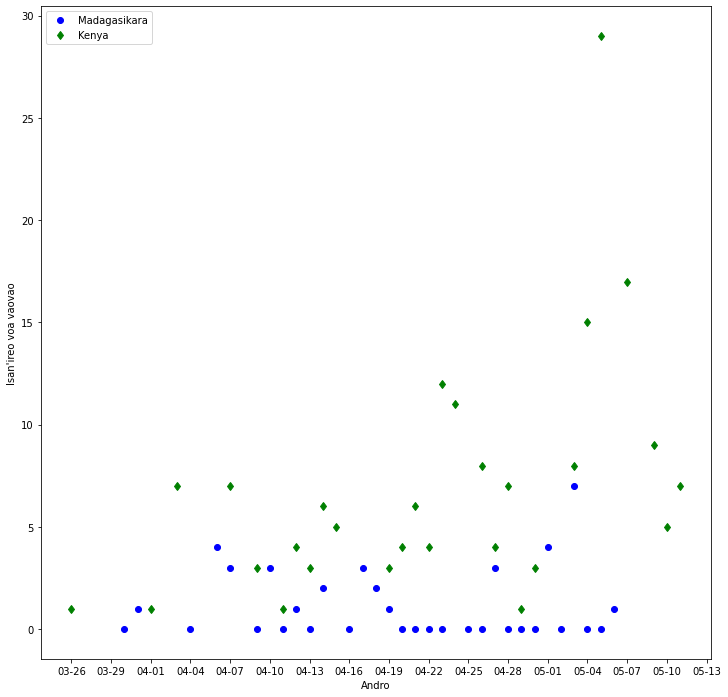

In [0]:
AntanaIvao.index = pd.to_datetime(AntanaIvao.index)
NairoIvao.index = pd.to_datetime(NairoIvao.index)

fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(AntanaIvao.index.values, AntanaIvao, marker ="o", ls = 'None', color='blue',label="Madagasikara")
ax.plot(NairoIvao.index.values, NairoIvao, marker = "d", ls = 'None', color='green', label='Kenya')
ax.set(xlabel ='Andro', ylabel = "Isan'ireo voa vaovao")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.savefig(path_to_save+'mdgkeIvao.eps')

plt.show()

In [0]:
tilyvoafar = tilyvoa.groupby('Faritra')
tilyvoamdg = tilyvoafar.get_group('Madagasikara')
tilyvoamdg.set_index('Daty', inplace=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


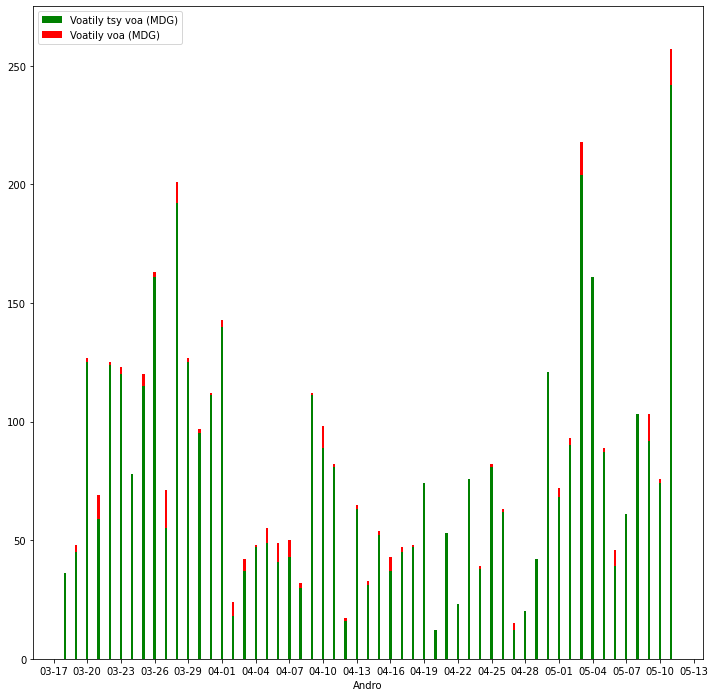

In [0]:
tilyvoamdg.index = pd.to_datetime(tilyvoamdg.index)

#df = pd.DataFrame(index=tilyvoa.index, data={'Voatily tsy voa': tilyvoa['Tsyvoa'], 'Voatily voa':tilyvoa['Voa']})
#df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.index, tilyvoamdg['Tsyvoatomb'], width= 0.2, color = 'green',label = 'Voatily tsy voa (MDG)')
ax.bar(tilyvoamdg.index, tilyvoamdg['Voatomb'], width= 0.2, bottom = tilyvoamdg['Tsyvoatomb'], color = 'red', label = 'Voatily voa (MDG)')

ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'upper left')

plt.ylim(0,275)
plt.savefig(path_to_save+'mdgtahatv.eps')

plt.show()

In [0]:
datacounty = ke_datafar.groupby('Faritra')

ketilyvoa = datacounty.get_group('Kenya')

ketilyvoa.set_index('Daty', inplace=True)
ketilyvoa.index = pd.to_datetime(ketilyvoa.index)
datacounty.get_group('Kenya').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 263
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Monitored/close contacts          12 non-null     object 
 1   Discharged after being monitored  9 non-null      float64
 2   Followed up                       7 non-null      float64
 3   Daty                              60 non-null     object 
 4   Faritra                           60 non-null     object 
 5   Tilytot                           12 non-null     float64
 6   Tilyvao                           11 non-null     float64
 7   Tilyvaotomb                       54 non-null     float64
 8   Itot                              54 non-null     float64
 9   Ivao                              54 non-null     float64
 10  Rtot                              12 non-null     float64
 11  Rvao                              18 non-null     float64
 12  Matot    

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1268: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


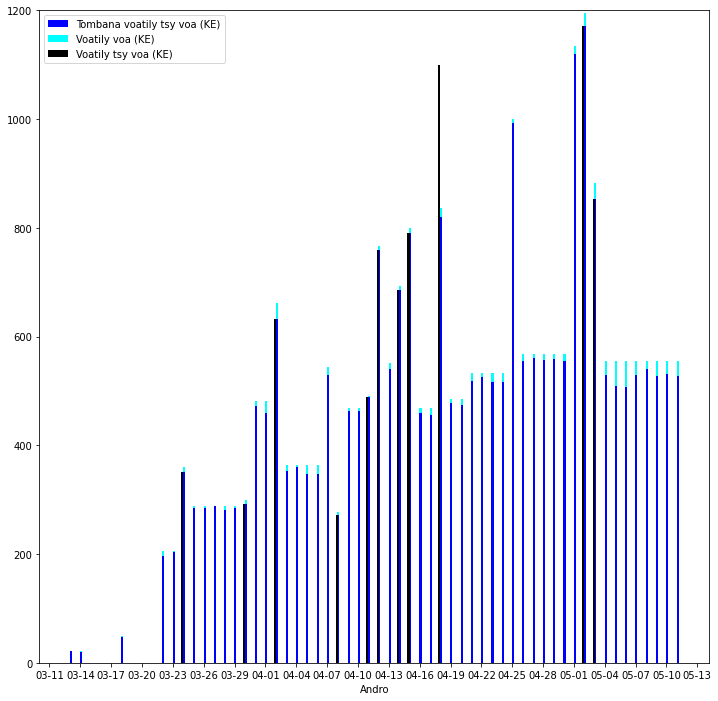

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

frt = np.ones(len(ketilyvoa.index))*datetime.timedelta(hours=2)

ax.bar(ketilyvoa.index + frt, ketilyvoa['Tsyvoatomb'], width= 0.2, color = 'blue', label = 'Tombana voatily tsy voa (KE)')
ax.bar(ketilyvoa.index + frt, ketilyvoa['Ivao'], width= 0.2, color ='cyan', bottom = ketilyvoa['Tsyvoatomb'], label = 'Voatily voa (KE)')
ax.bar(ketilyvoa.index - frt, ketilyvoa['Tsyvoa'], width= 0.2, color = 'black', label = 'Voatily tsy voa (KE)')

ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'upper left')

plt.ylim(0,1200)
plt.savefig(path_to_save+'ketahatv.eps')

plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1268: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


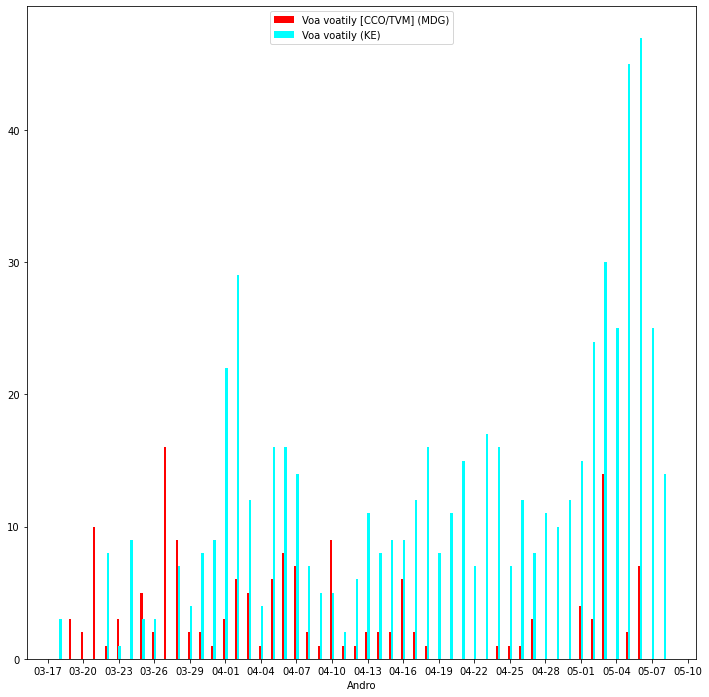

In [0]:
ketilyvoam = ketilyvoa.loc['2020-03-18':'2020-05-08']
tilyvoam = tilyvoamdg.loc['2020-03-18':'2020-05-08']

fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoam.index))*datetime.timedelta(hours=2)

ax.bar(tilyvoam.index - frtm, tilyvoam['Voatomb'], width = 0.2, color= 'red', label = 'Voa voatily [CCO/TVM] (MDG)')

ax.bar(ketilyvoam.index + frtm, ketilyvoam['Ivao'], width= 0.2, color = 'cyan', label = 'Voa voatily (KE)')

ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.savefig(path_to_save+'mdgkevoatomb.eps')

plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1268: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


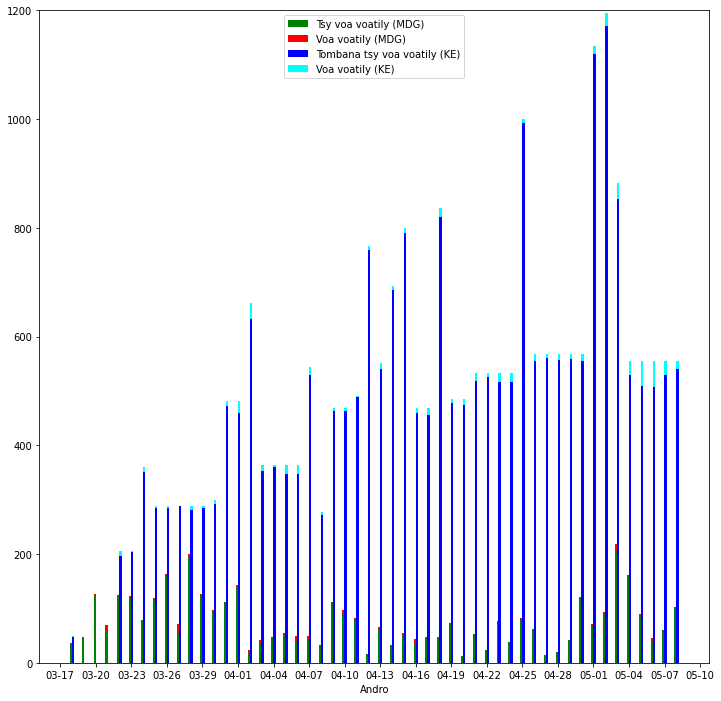

In [0]:
ketilyvoam = ketilyvoa.loc['2020-03-18':'2020-05-08']
tilyvoam = tilyvoamdg.loc['2020-03-18':'2020-05-08']

fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoam.index))*datetime.timedelta(hours=2)

ax.bar(tilyvoam.index - frtm, tilyvoam['Tsyvoatomb'], width = 0.2, color= 'green', label = 'Tsy voa voatily (MDG)')
ax.bar(tilyvoam.index - frtm, tilyvoam['Voatomb'], width = 0.2, color= 'red', bottom = tilyvoam['Tsyvoatomb'], label = 'Voa voatily (MDG)')

ax.bar(ketilyvoam.index + frtm, ketilyvoam['Tsyvoatomb'], width= 0.2, color = 'blue', label = 'Tombana tsy voa voatily (KE)')
ax.bar(ketilyvoam.index + frtm, ketilyvoam['Ivao'], width= 0.2, color ='cyan', bottom = ketilyvoam['Tsyvoatomb'], label = 'Voa voatily (KE)')

ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1200)
plt.savefig(path_to_save+'mdgkesartv.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


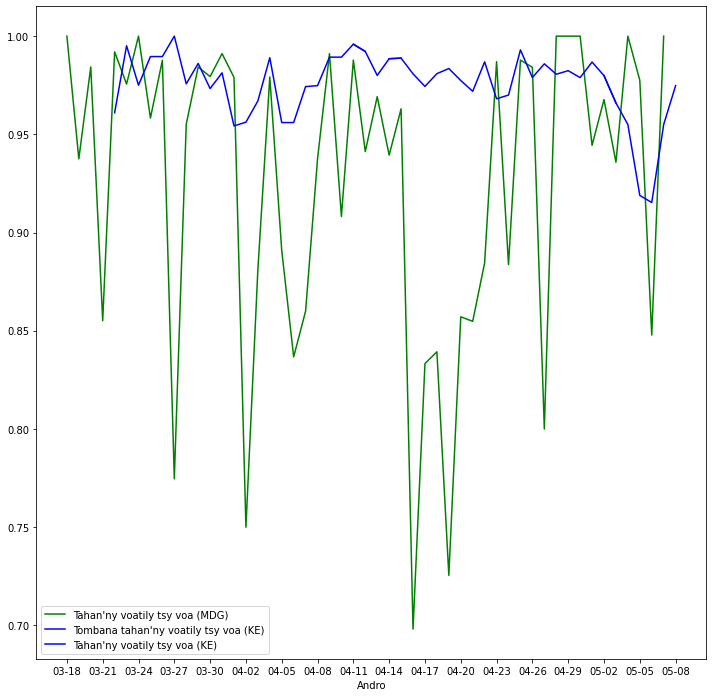

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoam.index, tilyvoam['Tahatv'], color= 'green', label = "Tahan'ny voatily tsy voa (MDG)")
ax.plot(ketilyvoam.index, ketilyvoam['Tahaketv'], color= 'blue', label = "Tombana tahan'ny voatily tsy voa (KE)")
ax.plot(ketilyvoam.index, ketilyvoam['Tahaketvtstomb'], color= 'blue', label = "Tahan'ny voatily tsy voa (KE)")
              
ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.savefig(path_to_save+'mdgketahatv.eps')

plt.show()